In [108]:
import torch
from torch import nn

device = "cuda"
print("Is CUDA enabled?",torch.cuda.is_available())

Is CUDA enabled? False


In [111]:
!pip install cudatoolkit==11.4.0

ERROR: Could not find a version that satisfies the requirement cudatoolkit==11.4.0 (from versions: none)
ERROR: No matching distribution found for cudatoolkit==11.4.0


## get data

In [2]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path

if image_path.is_dir():
    print("skipping download")
else:
    print("does not exist : creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
with open(data_path / "pizza_steak_sushi.zip","wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip") 
    f.write(request.content)
    
    
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    zip_ref.extractall(image_path)

skipping download


ConnectionError: HTTPSConnectionPool(host='github.com', port=443): Max retries exceeded with url: /mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000002B7FA1DBC10>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [11]:
image_path

WindowsPath('data')

# becoming one the data again


In [12]:
import os
def walk_through_dir(dir_path):
    """walks through die_path returning its content"""
    
    for dirpath , dirnames , filenames in os.walk(dir_path):
        print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")
    

In [13]:
walk_through_dir(image_path)

there are 3 directories and 1 images in data
there are 1 directories and 0 images in data\FashionMNIST
there are 0 directories and 8 images in data\FashionMNIST\raw
there are 3 directories and 0 images in data\test
there are 0 directories and 25 images in data\test\pizza
there are 0 directories and 19 images in data\test\steak
there are 0 directories and 31 images in data\test\sushi
there are 3 directories and 0 images in data\train
there are 0 directories and 78 images in data\train\pizza
there are 0 directories and 75 images in data\train\steak
there are 0 directories and 72 images in data\train\sushi


In [14]:
# setup train and testing paths

train_dir = image_path / "train"
test_dir = image_path / "test"


train_dir , test_dir

(WindowsPath('data/train'), WindowsPath('data/test'))

# visualizing

data\test\sushi\2394442.jpg
sushi
random image path: data\test\sushi\2394442.jpg
img height : 408 
img width : 512 


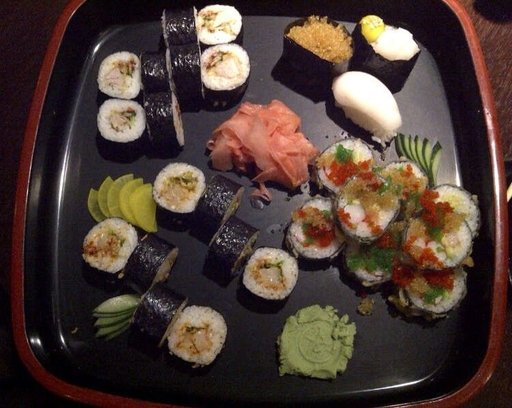

In [15]:
import random
from PIL import Image

random.seed(42)

image_path_list = list (image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)
print(random_image_path)


image_class = random_image_path.parent.stem
print(image_class)


img = Image.open(random_image_path)

print(f"random image path: {random_image_path}")
print(f"img height : {img.height} ")
print(f"img width : {img.width} ")
img

Text(0.5, 1.0, 'image class: sushi | image shape : (408, 512, 3)')

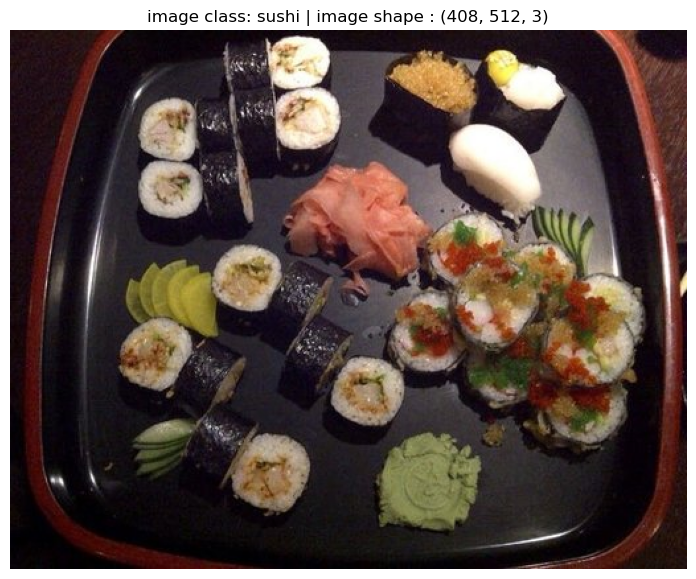

In [16]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)
plt.figure(figsize = (10, 7))
plt.imshow(img_as_array)
plt.axis(False)
plt.title(f"image class: {image_class} | image shape : {img_as_array.shape}")

# transforming data

In [17]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets , transforms


# transforming

In [18]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    
    transforms.RandomHorizontalFlip(p=0.5),
    
    transforms.ToTensor()
])

In [19]:
data_transform(img)

tensor([[[0.1294, 0.1373, 0.1412,  ..., 0.0863, 0.0824, 0.0824],
         [0.1255, 0.1373, 0.1412,  ..., 0.0902, 0.0902, 0.0902],
         [0.1294, 0.1412, 0.1333,  ..., 0.1059, 0.0980, 0.1137],
         ...,
         [0.0157, 0.0196, 0.0157,  ..., 0.1294, 0.1373, 0.1412],
         [0.0275, 0.0275, 0.0275,  ..., 0.1255, 0.1373, 0.1333],
         [0.0314, 0.0314, 0.0275,  ..., 0.1137, 0.1294, 0.1255]],

        [[0.0588, 0.0588, 0.0667,  ..., 0.0392, 0.0431, 0.0431],
         [0.0588, 0.0549, 0.0667,  ..., 0.0392, 0.0431, 0.0353],
         [0.0510, 0.0627, 0.0627,  ..., 0.0471, 0.0471, 0.0392],
         ...,
         [0.0039, 0.0078, 0.0078,  ..., 0.0667, 0.0667, 0.0667],
         [0.0118, 0.0118, 0.0118,  ..., 0.0706, 0.0706, 0.0667],
         [0.0118, 0.0157, 0.0196,  ..., 0.0667, 0.0667, 0.0667]],

        [[0.0667, 0.0667, 0.0667,  ..., 0.0706, 0.0706, 0.0745],
         [0.0784, 0.0784, 0.0863,  ..., 0.0941, 0.0902, 0.0863],
         [0.0824, 0.0863, 0.0941,  ..., 0.0941, 0.1059, 0.

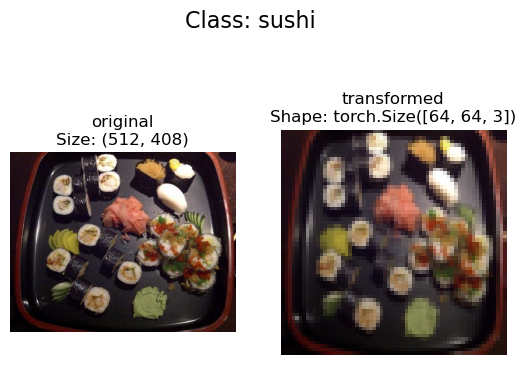

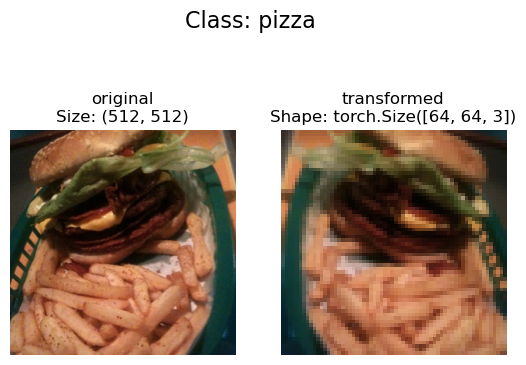

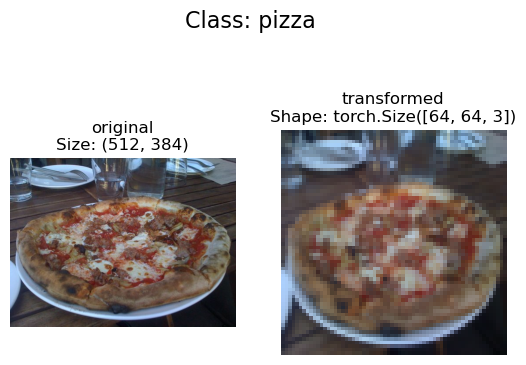

In [20]:
def plot_transformed_images(image_paths, transform, n=3 , seed = None):
    """
    selects random images from a path of images and load/transforms 
    them then plot the original vs the tra;nsformed version
    """
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths , k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig , ax = plt.subplots(nrows=1 , ncols = 2)
            ax[0].imshow(f)
            ax[0].set_title(f"original\nSize: {f.size}")
            ax[0].axis(False)
            
            transformed_image = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"transformed\nShape: {transformed_image.shape}")
            ax[1].axis("off")
            
            fig.suptitle(f"Class: {image_path.parent.stem}",fontsize = 16)
            
plot_transformed_images(image_paths= image_path_list,
                        transform=data_transform,
                        n = 3,
                        seed = 42)

# loading images

option 1 : ImageFolder

In [21]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir ,
                                 transform= data_transform,
                                 target_transform=None)

test_data = datasets.ImageFolder(root=test_dir ,
                                 transform= data_transform,
                                 target_transform=None)

test_data , train_data

(Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [22]:
class_names  = train_data.classes

class_names

['pizza', 'steak', 'sushi']

In [23]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [24]:
# check the lengths of our dataset
len(train_data),len(test_data)

(225, 75)

In [25]:
train_data.samples[0]

('data\\train\\pizza\\1008844.jpg', 0)

In [26]:
train_data[0]

(tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
          [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
          [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
          ...,
          [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
          [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],
 
         [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
          [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
          [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
          ...,
          [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
          [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
          [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],
 
         [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
          [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
          [0.0902, 0.0902, 0.0902,  ...,

In [27]:
img , label = train_data[0][0] , train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image  datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
 tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0

Original shape: torch.Size([3, 64, 64]) -> [color_channels , height, width]
Image permute: torch.Size([3, 64, 64]) -> [ height, width,color_channels]


Text(0.5, 1.0, 'pizza')

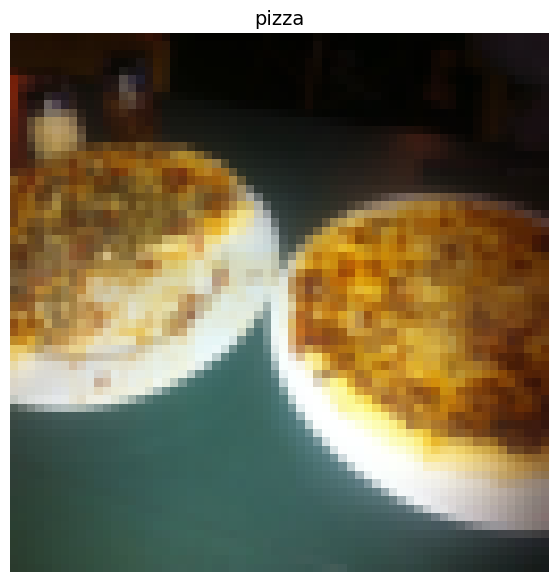

In [28]:
# Rearrange the order dimentions
img_permute = img.permute(1,2,0)

print(f"Original shape: {img.shape} -> [color_channels , height, width]")
print(f"Image permute: {img.shape} -> [ height, width,color_channels]")
plt.figure(figsize = (10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize = 14)

# turn loaded images into a data loader

In [29]:
from torch.utils.data import DataLoader
BATH_SIZE = 1
train_dataloader = DataLoader(dataset = train_data,batch_size=BATH_SIZE,
                             num_workers=1,
                             shuffle = True)



test_dataloader = DataLoader(dataset = test_data,batch_size=BATH_SIZE,
                             num_workers=1,
                             shuffle = True)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x2b7821a9870>,
 <torch.utils.data.dataloader.DataLoader at 0x2b78205b910>)

In [30]:
img , label = next(iter(train_dataloader))


# option 2 : loading data with custome dataset

In [31]:
import os
import pathlib
import torch


from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple , Dict , List

train_data.classes , train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

# creating a helper function to get class names

In [32]:
target_directory = train_dir
print(f"Target dir: {target_directory}")

class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data\train


['pizza', 'steak', 'sushi']

In [33]:
def find_classes(directory: str) -> Tuple[List[str],Dict[str,int]]:
    """Finds the class folder names in a target directory."""
    
    #1 . get the class names
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    
    # error handling
    
    if not classes:
        raise FileNotFoundError(f"couldnt find any classes in {directory}")
        
    # create a dictionary
    
    class_to_idx = {class_name : i for i , class_name in enumerate(classes)}
    return classes,class_to_idx

# create a custome data set to replicate the ImageFolder

In [34]:
# write a custome dataset class

from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
    def __init__(self,targ_dir: str , transform=None):
        
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        
        
        self.transform = transform
        
        
        self.classes , self.class_to_idx = find_classes(targ_dir)
        
        
        def load_image(self,index:int) -> Image.Image:
            "Opens an image via a path and returns is"
            image_path = self.paths[index]
            return Image.open(image_path)
        
        def __len__(self) -> int:
            return len(self.paths)
        
        def __getitem__(self , index: int) -> Tuple[torch.Tensor,int]:
            img = self.load_image(index)
            class_name = self.paths[index].parent.name
            class_idx = self.class_to_idx[class_name]
            
            if self.transform:
                return self.transform(img) , class_idx
            else:
                return img , class_idx
            

In [35]:
from torchvision import transforms
train_transforms = transforms.Compose([transforms.Resize(size=(64,64)),
                                      transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.ToTensor()
                                      ])
                                      
test_transforms = transforms.Compose([transforms.Resize(size=(64,64)),
                                      transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.ToTensor()])

In [36]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir , transform= train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir , transform= test_transforms)
test_data_custom

In [37]:
len(test_data), len(test_data_custom)

TypeError: object of type 'ImageFolderCustom' has no len()

In [38]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [39]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

# create a function to display random images

In [40]:
def display_random_images(dataset: torch.utils.data.Dataset,
                         classes : List[str] = None,
                         n: int = 10,
                         display_shape: bool = True,
                         seed: int = None):
    #adjust display
    if n > 10:
        n =10
        display_shape = False
        print(f"n shoildnt be larger then 10")
        
    if seed:
        random.seed(seed)
        
    random_sample_idx = random.sample(range(len(dataset)), k=n)
    
    
    plt.figure(figsize=(16,8))
    #loop through random indexes
    for i , targ_sample in enumerate(random_sample_idx):
        targ_image , targ_label = dataset[targ_sample][0],dataset[targ_sample][1]
        
        
        # adjust tensor dimentions
        
        targ_image_adjust= targ_image.permute(1,2,0)
        
        plt.subplot(1,n,i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title =  f"Class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

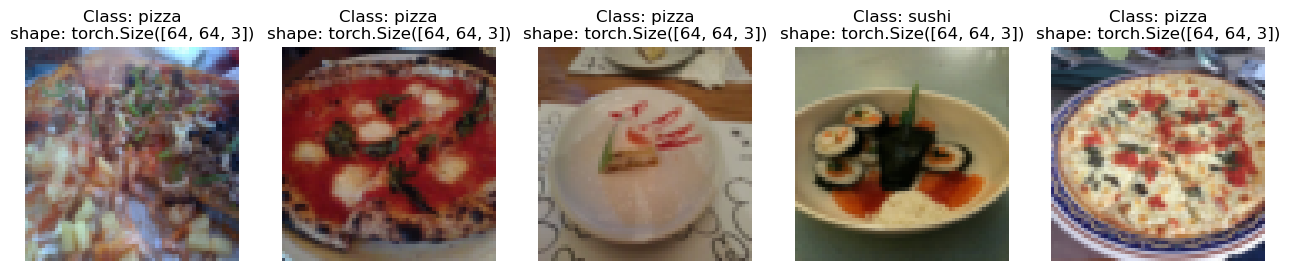

In [41]:
# display random images

display_random_images(train_data,
                     n = 5,
                     classes = class_names,
                     seed = None)

In [42]:
display_random_images(train_data_custom,
                     n = 5,
                     classes = class_names,
                     seed = None)

TypeError: object of type 'ImageFolderCustom' has no len()

# into data loader

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset = train_data,
                             batch_size=BATCH_SIZE,
                             num_workers=0,
                             shuffle=True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=0,
                             shuffle=False)
train_dataloader, test_dataloader

In [43]:

img.shape,label.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

# other forms of data transformation ( data augmentation)


In [44]:
# lets look at trivailaugment


from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])


test_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])



In [45]:
# get all image paths

image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[WindowsPath('data/test/pizza/1152100.jpg'),
 WindowsPath('data/test/pizza/1503858.jpg'),
 WindowsPath('data/test/pizza/1687143.jpg'),
 WindowsPath('data/test/pizza/1925494.jpg'),
 WindowsPath('data/test/pizza/194643.jpg'),
 WindowsPath('data/test/pizza/195160.jpg'),
 WindowsPath('data/test/pizza/2003290.jpg'),
 WindowsPath('data/test/pizza/2019408.jpg'),
 WindowsPath('data/test/pizza/2111981.jpg'),
 WindowsPath('data/test/pizza/2124579.jpg')]

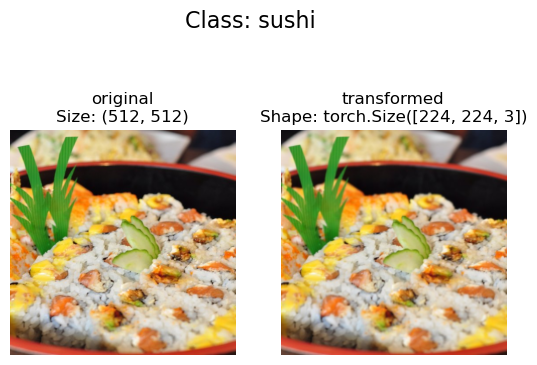

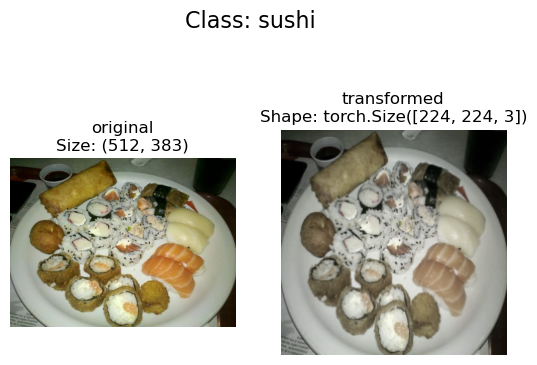

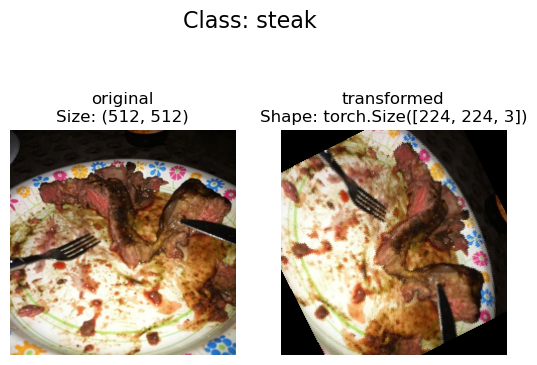

In [46]:
plot_transformed_images(
    image_paths=image_path_list,
    transform= train_transform,
    n=3,
    seed = None
)

## model 0 : tiny VGG without data aurgmentation

In [47]:
# Create simple transform
simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [48]:
#1 . load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root= train_dir,
                                        transform=simple_transform)

test_data_simple = datasets.ImageFolder(root= test_dir,
                                        transform=simple_transform)

# turn into data loaders
import os 
from torch.utils.data import DataLoader

# set up batch size
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# create data loaders
train_dataloader_simple = DataLoader(dataset= train_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle= True,
                                    num_workers=NUM_WORKERS)


test_dataloader_simple = DataLoader(dataset= test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle= False,
                                    num_workers=NUM_WORKERS)

# create tinyVGG

In [49]:
class TinyVGG(nn.Module):
    """
    TinyVGG copy
    """
    
    def __init__(self,
                 input_shape:int,
                 hidden_units: int,
                 output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels= hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                        stride=2)
        )
        
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels= hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                        stride=2)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*169,
                     out_features=output_shape)
        )
        
    def forward(self,x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
         
         

In [50]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3 , hidden_units=10,output_shape=len(class_names))

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [51]:
## try it on a single image
image_batch , label_batch = next(iter(train_dataloader_simple))
image_batch.shape , label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [52]:
model_0(image_batch)

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4669e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9129e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6418e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7905e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7978e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1816e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3994e-03,  9.4989e-03],
        [ 2.2101e-02, -4.1470e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.2410e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

## using torchinfo

In [53]:
from torchinfo import summary
summary(model_0 , input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

# creat a train and test step function

In [54]:
def train_step(model : torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer):
    model.train()
    
    train_loss ,train_acc = 0,0
    
    for batch, (x,y) in enumerate(dataloader):
        y_pred = model(x)
        
        loss = loss_fn(y_pred,y)
        train_loss += loss.item()
        
        optimizer.zero_grad()
        
        
        loss.backward()
        
        optimizer.step()
        
        y_pred_class = torch.argmax(torch.softmax(y_pred ,dim=1),dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)
        
    train_loss = train_loss/ len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss ,train_acc

In [55]:
def test_step(model : torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    model.eval()
    
    test_loss , test_acc = 0,0
    
    with torch.inference_mode():
        
        for batch,(x,y) in enumerate(dataloader):
            
            test_pred_logits = model(x)
            
            loss = loss_fn(test_pred_logits , y)
            test_loss += loss.item()
            
            test_pred_labels  =  test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
        test_loss = test_loss / len(dataloader)
        test_acc = test_acc /len(dataloader)
        return test_loss , test_acc
            
   
    

In [56]:
from tqdm.auto import tqdm
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn:torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # create an empty result dictionary
    results = {"train_loss" : [],
              "train_acc": [],
              "test_loss": [],
              "test_acc": []}
    
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model = model,
                                           dataloader=train_dataloader,
                                           loss_fn = loss_fn,
                                           optimizer=optimizer)
        
        test_loss, test_acc = test_step(model = model,
                                           dataloader=test_dataloader,
                                           loss_fn = loss_fn)
        
        # print whats happening
        print(f"Epoch: {epoch} | Train loss: {train_loss: .4f} | Train acc: {train_acc: .4f} | Test loss: {test_loss: .4f} | Test acc: {test_acc: .4f} ")
        
        # update result dic
        
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
        
    return results
    
        
    

### trainand evaluate model_0

In [57]:
torch.manual_seed(42)
NUM_EPOCHS = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                            lr = 0.001)

from timeit import default_timer as timer
start_time = timer()
model_0_results = train(model= model_0,
                       train_dataloader=  train_dataloader_simple,
                       test_dataloader= test_dataloader_simple,
                       optimizer = optimizer,
                       loss_fn=loss_fn,
                       epochs=NUM_EPOCHS)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss:  1.1035 | Train acc:  0.2500 | Test loss:  1.0993 | Test acc:  0.2604 
Epoch: 1 | Train loss:  1.0761 | Train acc:  0.4258 | Test loss:  1.1299 | Test acc:  0.2604 
Epoch: 2 | Train loss:  1.0726 | Train acc:  0.4258 | Test loss:  1.1625 | Test acc:  0.2604 
Epoch: 3 | Train loss:  1.1112 | Train acc:  0.3047 | Test loss:  1.1521 | Test acc:  0.2708 
Epoch: 4 | Train loss:  1.0823 | Train acc:  0.3516 | Test loss:  1.1493 | Test acc:  0.2500 


# plot the loss curves

In [58]:
model_0_results.keys()


dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [59]:
def plot_loss_curves(results: Dict[str, List[float]]):
    
    loss = results["train_loss"]
    test_loss = results["test_loss"]
    
    
    
    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]
    
    
    epochs = range(len(results["train_loss"]))
    
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,2,1)
    plt.plot(epochs,loss ,label= "train_loss")
    plt.plot(epochs,test_loss ,label= "test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    
    
    plt.subplot(1,2,2)
    plt.plot(epochs,accuracy ,label= "train_accuracy")
    plt.plot(epochs,test_accuracy ,label= "test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()
    

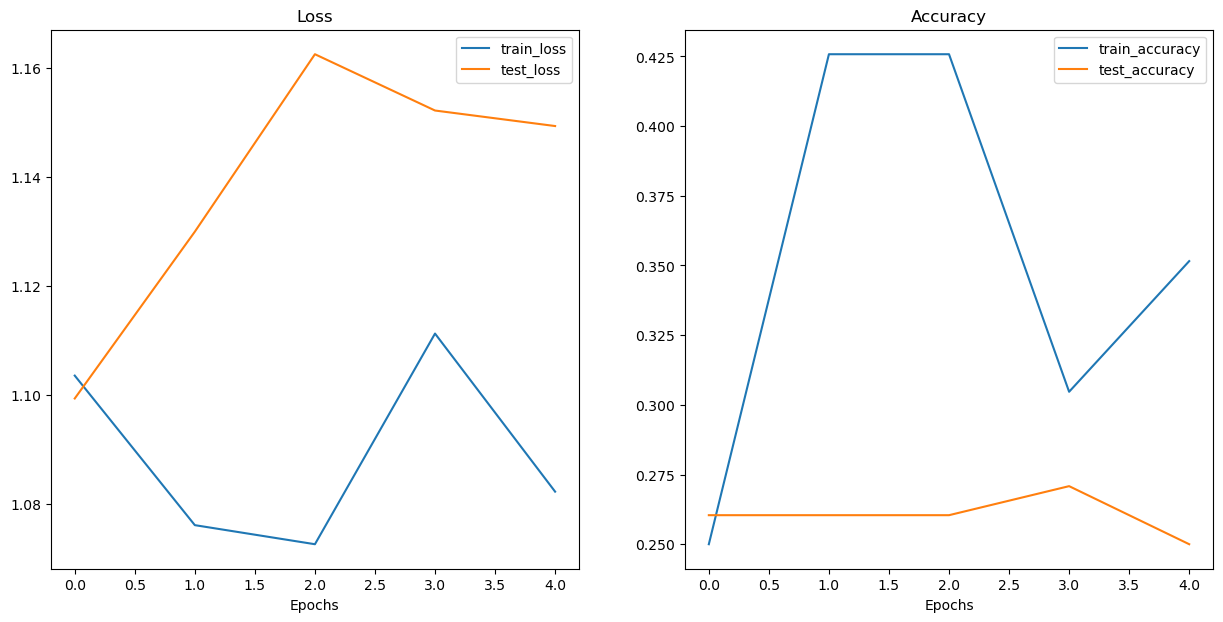

In [60]:
plot_loss_curves(model_0_results)

# model 1 : with data aurgmentation

In [61]:
from torchvision import transforms
train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])


test_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [67]:
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                           transform=train_transform_trivial)

test_data_augmented = datasets.ImageFolder(root=test_dir,
                                           transform=test_transform_trivial)

In [68]:
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented,shuffle=True,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)
test_dataloader_augmented = DataLoader(test_data_augmented,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)

In [107]:
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                 hidden_units=10,
                 output_shape=len(train_data_augmented.classes)).to(device)
model_1

AssertionError: Torch not compiled with CUDA enabled

In [116]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 10

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_1.parameters(),lr = 0.001)

from timeit import default_timer as timer
start_time = timer()

model_1_results = train(model = model_1,
                       train_dataloader= train_dataloader_augmented,
                        test_dataloader= test_dataloader_augmented,
                       optimizer=optimizer,
                       loss_fn= loss_fn,
                       epochs=NUM_EPOCHS)

end_time = timer()
print(f"total training time for model_1: {end_time - start_time:.3f} seconds")


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 | Train loss:  1.0652 | Train acc:  0.5234 | Test loss:  1.0793 | Test acc:  0.3125 
Epoch: 1 | Train loss:  1.0101 | Train acc:  0.5000 | Test loss:  1.0999 | Test acc:  0.3125 
Epoch: 2 | Train loss:  0.9762 | Train acc:  0.5195 | Test loss:  1.1156 | Test acc:  0.3835 
Epoch: 3 | Train loss:  0.9334 | Train acc:  0.5781 | Test loss:  1.0840 | Test acc:  0.3314 
Epoch: 4 | Train loss:  0.8794 | Train acc:  0.6094 | Test loss:  1.0758 | Test acc:  0.3523 
Epoch: 5 | Train loss:  1.1693 | Train acc:  0.4219 | Test loss:  1.0547 | Test acc:  0.3627 
Epoch: 6 | Train loss:  0.8947 | Train acc:  0.6016 | Test loss:  1.0287 | Test acc:  0.5057 
Epoch: 7 | Train loss:  0.9876 | Train acc:  0.5938 | Test loss:  1.0332 | Test acc:  0.3826 
Epoch: 8 | Train loss:  0.9827 | Train acc:  0.4805 | Test loss:  1.0675 | Test acc:  0.3835 
Epoch: 9 | Train loss:  0.9331 | Train acc:  0.5742 | Test loss:  0.9839 | Test acc:  0.4119 
total training time for model_1: 192.315 seconds


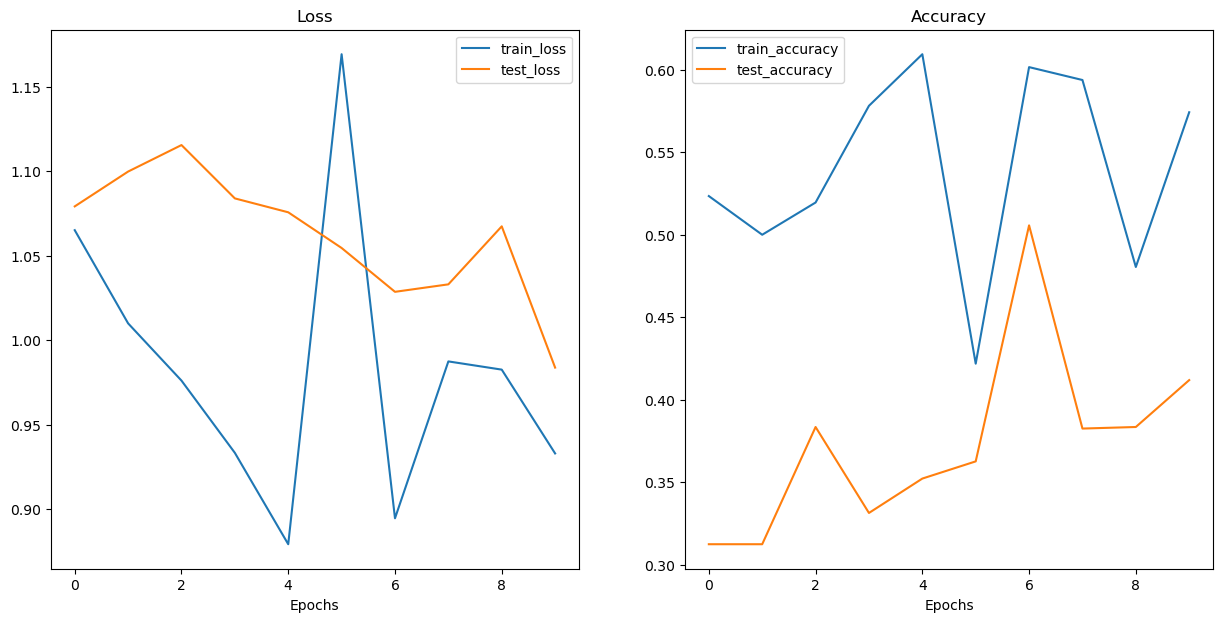

In [117]:
plot_loss_curves(model_1_results)

# compare

In [74]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)

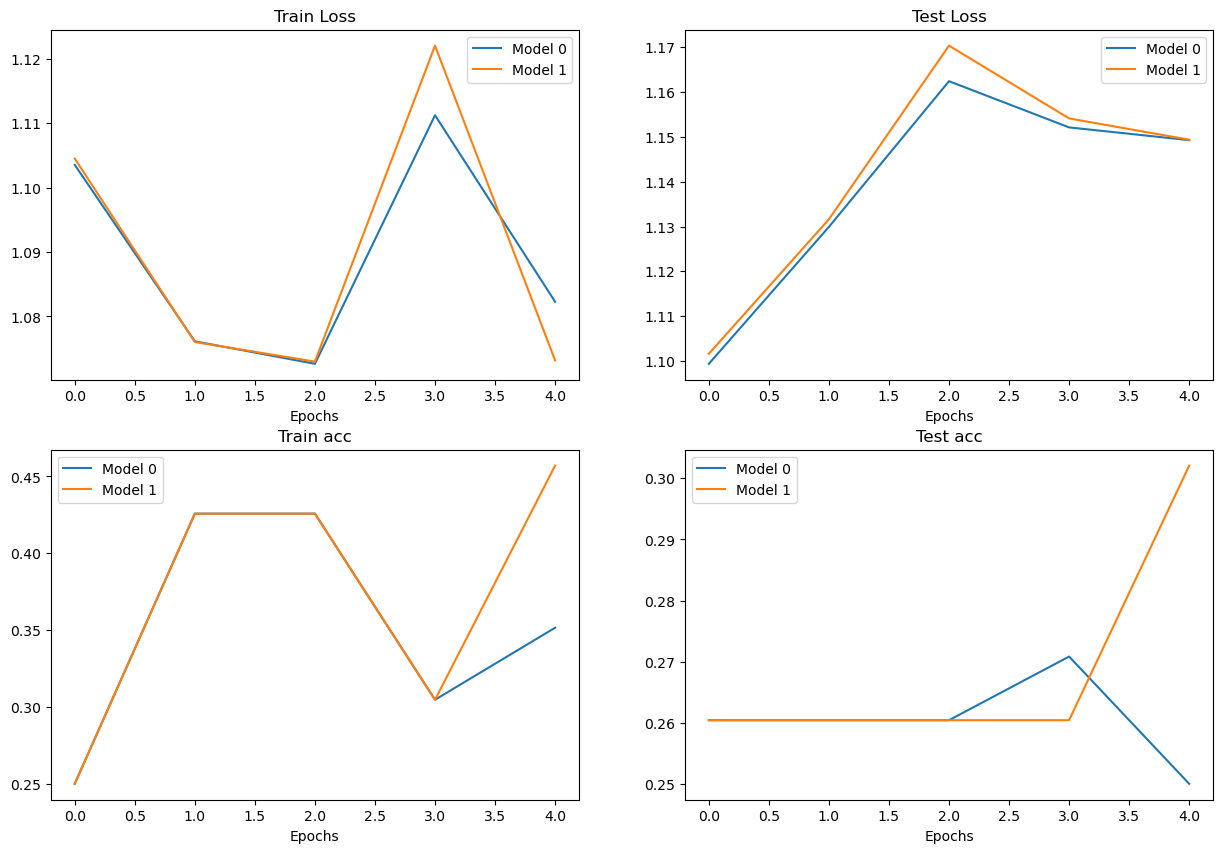

In [80]:
plt.figure(figsize=(15,10))

epochs = range(len(model_0_df))

plt.subplot(2,2,1)
plt.plot(epochs , model_0_df["train_loss"],label="Model 0")
plt.plot(epochs , model_1_df["train_loss"],label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs , model_0_df["test_loss"],label="Model 0")
plt.plot(epochs , model_1_df["test_loss"],label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()


plt.subplot(2,2,3)
plt.plot(epochs , model_0_df["train_acc"],label="Model 0")
plt.plot(epochs , model_1_df["train_acc"],label="Model 1")
plt.title("Train acc")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs , model_0_df["test_acc"],label="Model 0")
plt.plot(epochs , model_1_df["test_acc"],label="Model 1")
plt.title("Test acc")
plt.xlabel("Epochs")
plt.legend();

In [82]:
import requests
custom_image_path = data_path / "04-pizza-dad.jpeg"


if not custom_image_path.is_file():
    with open(custom_image_path ,"wb") as f:
        
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print("skipping download")

In [88]:
import torchvision

custom_image_unit8 = torchvision.io.read_image(str(custom_image_path))
print(f"shape is: {custom_image_unit8.shape}")
print(f"type: {custom_image_unit8.dtype}")

shape is: torch.Size([3, 4032, 3024])
type: torch.uint8


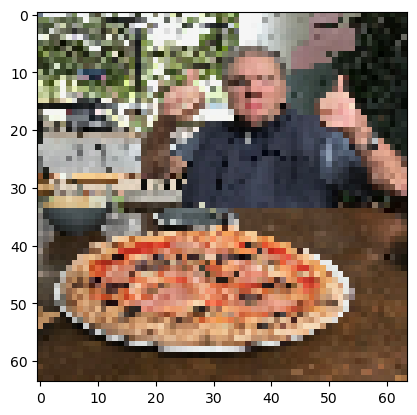

In [96]:
plt.imshow(custom_image_transformed.permute(1,2,0))

In [118]:
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32) / 255.

custom_image_transform = transforms.Compose([
    transforms.Resize(size=(64,64))
])

custom_image_transformed = custom_image_transform(custom_image)
custom_image_transformed.shape

C:\Users\POUYA\AppData\Roaming\Python\Python310\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([3, 64, 64])

In [119]:
model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(0))
    
custom_image_pred

tensor([[-0.2027, -0.3016, -0.3289]])

In [120]:
custom_image_pred_prob = torch.softmax(custom_image_pred,dim=1)
custom_image_pred_label = torch.argmax(custom_image_pred_prob,dim=1)
class_names[custom_image_pred_label]

'pizza'